In [11]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

# Seed
np.random.seed(1)

In [12]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [13]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

X_Train:	 (50000, 32, 32, 3)
y_train:	 (50000, 1)
X_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)

Input Shape:	 (32, 32, 3)


In [14]:
# Scaling

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

In [7]:
def get_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [8]:
# Hyperparameters

batch_size = 128
epochs = 100

In [9]:
model_sgd_plain = get_model()

Model initialized. Please compile before training.


In [10]:
model_sgd_plain.summary()
sgd_plain = keras.optimizers.SGD()
model_sgd_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_sgd_plain = model_sgd_plain.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [15]:
model_sgd_plain.save('model_sgd_plain.h5')

ADAM

In [16]:
model_adam = get_model()

Model initialized. Please compile before training.


In [17]:
model_adam.summary()
adam = keras.optimizers.Adam()
model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

In [18]:
model_adam.save('model_adam.h5')

RMSProp

In [19]:
model_rms = get_model()

Model initialized. Please compile before training.


In [20]:
model_rms.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop = model_rms.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [21]:
model_rms.save('model_rms.h5')

ADADELTA

In [22]:
model_adadelta = get_model()

Model initialized. Please compile before training.


In [23]:
model_adadelta.summary()
adadelta = keras.optimizers.Adadelta()
model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta = model_adadelta.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

In [24]:
model_adadelta.save('model_adadelta.h5')

Adagrad

In [25]:
model_adagrad = get_model()

Model initialized. Please compile before training.


In [26]:
model_adagrad.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [27]:
model_adagrad.save('model_adagrad.h5')

**Accuracy** **Plot**

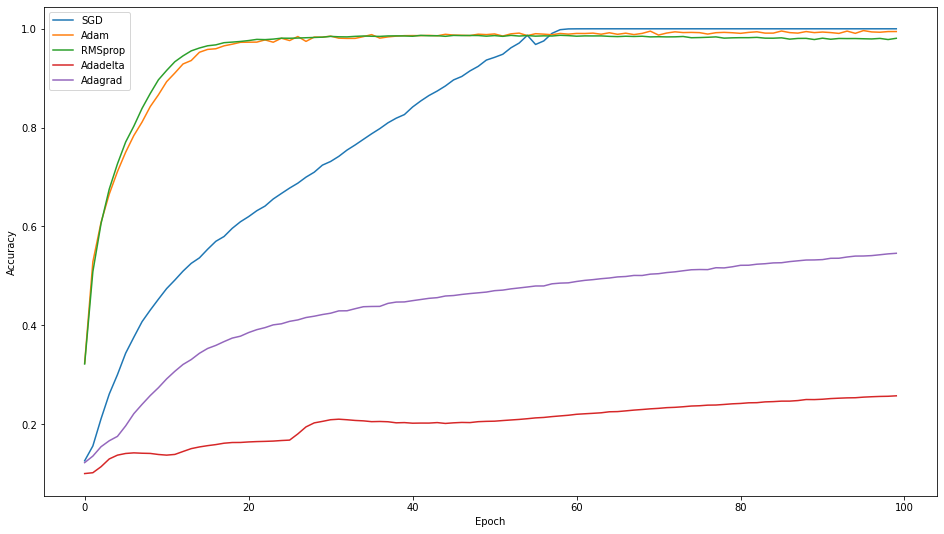

In [28]:
# Combined Training Accuracy Plot

plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

Different Architecture
1. adding more hidden layers

In [29]:
def get_new_model_architecture():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [33]:
# Hyperparameters

batch_size = 128
epochs = 100

In [34]:
model_sgd_plain_2 = get_new_model_architecture()

Model initialized. Please compile before training.


In [35]:
model_sgd_plain_2.summary()
sgd_plain = keras.optimizers.SGD()
model_sgd_plain_2.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
history_sgd_plain_2 = model_sgd_plain_2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)             

In [36]:
model_sgd_plain_2.save('model_sgd_plain_2.h5')

ADAM

In [37]:
model_adam_2 = get_new_model_architecture()

Model initialized. Please compile before training.


In [38]:
model_adam_2.summary()
adam = keras.optimizers.Adam()
model_adam_2.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam_2 = model_adam_2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)             

In [39]:
model_adam_2.save('model_adam_2.h5')

RMSProp

In [40]:
model_rms_2 = get_new_model_architecture()

Model initialized. Please compile before training.


In [41]:
model_rms_2.summary()
rmsprop = keras.optimizers.RMSprop()
model_rms_2.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop_2 = model_rms_2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)             

In [42]:
model_rms_2.save('model_rms_2.h5')

ADADELTA

In [43]:
model_adadelta_2 = get_new_model_architecture()

Model initialized. Please compile before training.


In [44]:
model_adadelta_2.summary()
adadelta = keras.optimizers.Adadelta()
model_adadelta_2.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta_2 = model_adadelta_2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)             

In [45]:
model_adadelta_2.save('model_adadelta_2.h5')

Adagrad

In [46]:
model_adagrad_2 = get_new_model_architecture()

Model initialized. Please compile before training.


In [47]:
model_adagrad_2.summary()
adagrad = keras.optimizers.Adagrad()
model_adagrad_2.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad_2= model_adagrad_2.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)            

In [48]:
model_adagrad_2.save('model_adagrad_2.h5')

Accuracy plot of new Architecture

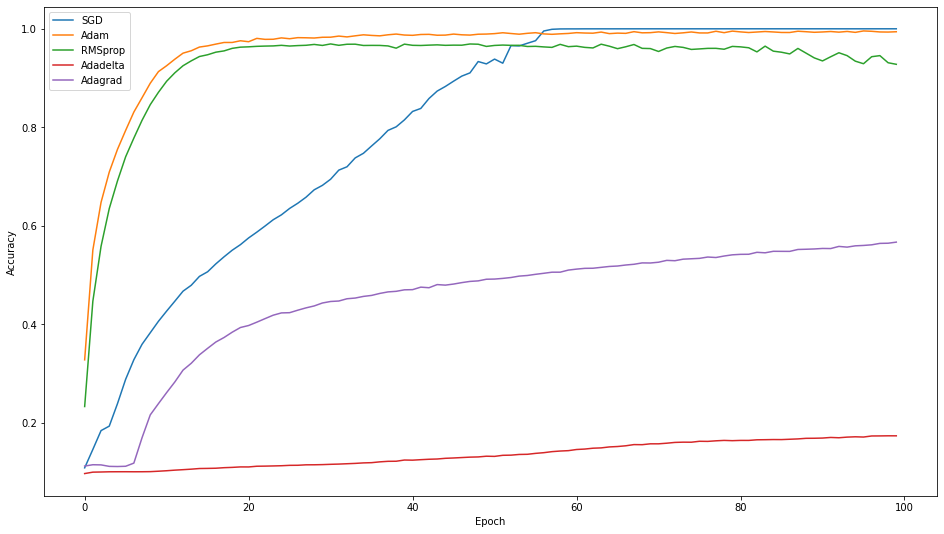

In [50]:
# Combined Training Accuracy Plot

plt.plot(history_sgd_plain_2.history['accuracy'])
plt.plot(history_adam_2.history['accuracy'])
plt.plot(history_rmsprop_2.history['accuracy'])
plt.plot(history_adadelta_2.history['accuracy'])
plt.plot(history_adagrad_2.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy_2.jpg', dpi=200)

**ADAGRAD**
1. Adaptive learning rate method. We adapt learning rates according to the parameters. 
2. We perform larger updates for infrequent parameters and smaller updates for frequent parameters.
3. Different learning rate for every parameter theta at every time step t.
4. Eliminates need to manually update learning rate.
5. The learning rate is inversely affected by the sum of the square of the past gradients.
6. Each term is a positive term so it keeps on growing to make the learning rate η infinitesimally small to the point that algorithm is no longer able learning. 
7. Adadelta, RMSProp, and adam tries to resolve Adagrad’s radically diminishing learning rates.



**ADADELTA**
1. Adadelta is an extension of Adagrad and it also tries to reduce Adagrad’s aggressive, monotonically reducing the learning rate.
2. It does this by restricting the window of the past accumulated gradient to some fixed size of w. Running average at time t then depends on the previous average and the current gradient.
3. In Adadelta we do not need to set the default learning rate as we take the ratio of the running average of the previous time steps to the current gradient


**RMSProp**
1. RMSProp is Root Mean Square Propagation.
2. RMSProp tries to resolve Adagrad’s radically diminishing learning rates by using a moving average of the squared gradient. It utilizes the magnitude of the recent gradient descents to normalize the gradient.
3. In RMSProp learning rate gets adjusted automatically and it chooses a different learning rate for each parameter.
4. RMSProp divides the learning rate by the average of the exponential decay of squared gradients


**ADAM**
1. ADAM can be viewed as a combination of ADAGRAD and RMSprop.
2. Adam implements the exponential moving average of the gradients to scale the learning rate instead of a simple average as in Adagrad. It keeps an exponentially decaying average of past gradients
3. Adam is computationally efficient and has very little memory requirement.
4. Adam optimizer is one of the most popular gradient descent optimization algorithms


**COMPARING TRAINING CURVES OF DIFFERENT OPTIMIZERS**


1.  Steps until convergence : ADAM and RMSprop performed almost same when it comes to convergence. SGD converged later bit after convergence accuracy is more. ADAGRAD and ADADELTA also converged faster as compared to SGD but accuracy of ADADELTA fluctuates a little before converging.
2.  Training accuracy (or loss) when converged: After convergence SGD shows highest accuracy followed by RMSProp and ADAM which performed similarly. ADADELTA and ADAGRAD have lower accuracy may be because of diminishing learning rate.
3.  Stability of training (fluctuation of the curve): After converging curves of ADADELTA, ADAGRAD and SGD are almost stable but minor fluctuations can be seen in curves of RMSProp and ADAM.

**COMPARISON OF DIFFERENT ARCHITECTURES**
Overall the different optimizers performed similarly on both archotectures but the RMSProp fluctuates more in Architecture 2 which contains more hidden layers. It could be bacause of using a moving average of the squared gradient. RMSProp utilizes the magnitude of the recent gradient descents to normalize the gradient.


